In [1]:
import pandas as pd
import numpy as np
from shapely.geometry import box

In [2]:
# pd.set_option("display.max_rows", None)
# pd.set_option("display.max_columns", None)
# pd.set_option("display.width", None)
# pd.set_option("display.max_colwidth", None)

In [3]:
from pathlib import Path
import os
from dotenv import load_dotenv

In [7]:
load_dotenv()

True

In [8]:
BASE_DIR = Path(os.getenv("BASE_DIR"))
MIN_STRINGS_PATH = os.getenv("MIN_STRINGS_PATH")

In [9]:
MIN_STRINGS_PATH

'4_GA_OZMIN_MineralDeposits_v02_20130830'

In [22]:
shp_path = BASE_DIR / MIN_STRINGS_PATH / "Strike" / "MINERALOCCURRENCES_shp" / "MINERALOCCURRENCES.shp"

gdf = gpd.read_file(shp_path)

In [23]:
gdf.iloc[500]

MODAT_ID                                             445
NAME                                       Unnamed 00445
MIN_CATGRY                                   Base metals
COM_MAJOR                                         Copper
COM_MINOR                                           None
STATUS                                Mineral occurrence
MIN_FIELD                           Cullen Mineral Field
GEOLREGION                             Pine Creek Orogen
GEOLPRVNCE                                          None
EON                                                 None
ERA                                                 None
PERIOD                                              None
MAP100                                         Batchelor
EASTING                                           762029
NORTHING                                         8511561
ZONE_MGA                                              52
LOC_METHOD                                       Unknown
LOC_ACCURY                     

In [24]:
len(gdf)

3452

In [25]:
gdf.MODAT_ID.nunique()

3452

In [26]:
gdf.crs

<Geographic 2D CRS: EPSG:4283>
Name: GDA94
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Australia including Lord Howe Island, Macquarie Island, Ashmore and Cartier Islands, Christmas Island, Cocos (Keeling) Islands, Norfolk Island. All onshore and offshore.
- bounds: (93.41, -60.55, 173.34, -8.47)
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [27]:
len(gdf)

3452

In [28]:
gdf.COM_MAJOR.unique()

array(['Mica', 'Copper', 'REE', 'Gold', 'Uranium', 'Vanadium', 'Zinc',
       'Iron ore', 'Lithium', 'Bauxite', 'Tin', 'Coal', 'Graphite',
       'Titanium', 'Lead', 'Amethyst', 'Tantalum', 'Barite', 'Phosphate',
       'Magnesite', 'Tungsten', 'Corundum', 'Bismuth', 'Nickel',
       'Asbestos', 'Thorium', 'Zircon', 'Manganese', 'Apatite',
       'Beryllium', 'Azurite', 'Fluorite', 'Opal', 'Turquoise',
       'Chromium', 'Silver', 'Monazite', 'Citrine', 'Limestone',
       'Diamonds', 'Talc', 'Dimension Stone', 'Gypsum', 'Epidote',
       'Aggregate', 'Ochre', 'Topaz', 'Marble', 'Salt', 'Garnet',
       'Vermiculite', 'Ilmenite', 'Potassium', 'Heavy Mineral Sands',
       'Prehnite', 'Platinum', 'Silica', 'Cobalt'], dtype=object)

In [29]:

gdf.STATUS.unique()

array(['Historical workings', 'Show', 'Prospect', 'Ceased mine',
       'Mineral occurrence', 'Deposit'], dtype=object)

In [30]:
gdf_cu = gdf[gdf["COM_MAJOR"] == "Copper"].copy()
len(gdf_cu)

585

In [31]:
gdf_cu

,MODAT_ID,NAME,MIN_CATGRY,COM_MAJOR,COM_MINOR,STATUS,MIN_FIELD,GEOLREGION,GEOLPRVNCE,EON,...,ORECONTRL2,HOSTRELATN,DIPDIRECTN,DIP,COMMENTS1,COMMENTS2,COMMENTS3,PROD_COMME,MIN_METHOD,geometry
7,6334,Unnamed6212,Base metals,Copper,None,Show,None,Arunta Region,Aileron Province,None,...,None,None,NaN,NaN,None,None,None,None,None,POINT (135.43624 -22.66412)
30,6300,Sunset Boulevarde,Base metals,Copper,None,Prospect,None,Aileron Province,None,None,...,None,None,NaN,NaN,None,None,None,None,None,POINT (136.85226 -22.95651)
58,6299,Ningaloo,Base metals,Copper,None,Prospect,None,Aileron Province,None,None,...,None,None,NaN,NaN,None,None,None,None,None,POINT (136.8411 -22.95105)
70,20,Unnamed 00020,Base metals,Copper,None,Mineral occurrence,None,Ord Basin,None,None,...,None,stratabound,NaN,NaN,Mineralisation was reported from near the cont...,None,None,None,None,POINT (129.40146 -17.4496)
72,22,Unnamed 00022,Base metals,Copper,None,Mineral occurrence,None,Arunta Region,Yambah Block West,None,...,None,stratiform,NaN,NaN,None,None,None,None,None,POINT (133.77152 -23.03506)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,2574,Gecko 1,Base metals,Copper,"Bismuth,Gold,Silver",Ceased mine,Tennant Creek Gold Field,Tennant Region,Warramunga Province,None,...,shear,discordant,10.0,80.0,None,None,None,None,Underground,POINT (134.06675 -19.42963)
3381,2514,Queen of Sheba Cu,Base metals,Copper,None,Mineral occurrence,Pinnacles Copper Field,Arunta Region,Yambah Block East,None,...,host rock,vein,NaN,NaN,None,None,None,None,Open Cut,POINT (134.31298 -23.17375)
3383,2516,Rankins II,Base metals,Copper,None,Mineral occurrence,None,Arunta Region,Ankala Block,None,...,None,stratiform,NaN,NaN,None,None,None,None,None,POINT (134.11963 -23.29044)
3425,2521,Turners,Base metals,Copper,Gold,Mineral occurrence,Winnecke Gold Field,Arunta Region,Ankala Block,None,...,None,vein,NaN,NaN,None,None,None,None,None,POINT (134.25097 -23.34532)


In [32]:
gdf_cu = gdf_cu.to_crs(28352)
gdf_cu.crs

<Projected CRS: EPSG:28352>
Name: GDA94 / MGA zone 52
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Australia - onshore and offshore between 126°E and 132°E.
- bounds: (125.99, -37.38, 132.0, -9.1)
Coordinate Operation:
- name: Map Grid of Australia zone 52
- method: Transverse Mercator
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
import geopandas as gpd
from pathlib import Path

path = BASE_DIR / MIN_STRINGS_PATH / "Strike" / "MINERALOCCURRENCES_shp" / "cu_occurrences_buffer_5km.gpkg"

gdf_label = gpd.read_file(path, engine="pyogrio")

gdf_label.head()

,MODAT_ID,NAME,MIN_CATGRY,COM_MAJOR,COM_MINOR,STATUS,MIN_FIELD,GEOLREGION,GEOLPRVNCE,EON,...,HOSTRELATN,DIPDIRECTN,DIP,COMMENTS1,COMMENTS2,COMMENTS3,PROD_COMME,MIN_METHOD,status_weight,geometry
0,6334,Unnamed6212,Base metals,Copper,None,Show,None,Arunta Region,Aileron Province,None,...,None,NaN,NaN,None,None,None,None,None,0.4,"POLYGON ((1167202.392 7479288.518, 1167178.316..."
1,6300,Sunset Boulevarde,Base metals,Copper,None,Prospect,None,Aileron Province,None,None,...,None,NaN,NaN,None,None,None,None,None,0.6,"POLYGON ((1311737.267 7439640.635, 1311713.191..."
2,6299,Ningaloo,Base metals,Copper,None,Prospect,None,Aileron Province,None,None,...,None,NaN,NaN,None,None,None,None,None,0.6,"POLYGON ((1310618.242 7440310.911, 1310594.166..."
3,20,Unnamed 00020,Base metals,Copper,None,Mineral occurrence,None,Ord Basin,None,None,...,stratabound,NaN,NaN,Mineralisation was reported from near the cont...,None,None,None,None,0.8,"POLYGON ((547630 8070662, 547605.924 8070171.9..."
4,22,Unnamed 00022,Base metals,Copper,None,Mineral occurrence,None,Arunta Region,Yambah Block West,None,...,stratiform,NaN,NaN,None,None,None,None,None,0.8,"POLYGON ((994260.997 7444614.831, 994236.921 7..."


In [33]:
status_weight = {
    "Deposit": 1.0,
    "Ceased mine": 1.0,
    "Historical workings": 0.9,
    "Mineral occurrence": 0.8,
    "Prospect": 0.6,
    "Show": 0.4,
}

In [34]:
gdf_cu["status_weight"] = gdf_cu["STATUS"].map(status_weight)

In [35]:
buffer_m = 5000  # 5 km

gdf_buf = gdf_cu.copy()
gdf_buf["geometry"] = gdf_buf.geometry.buffer(buffer_m)

In [36]:
gdf_buf

,MODAT_ID,NAME,MIN_CATGRY,COM_MAJOR,COM_MINOR,STATUS,MIN_FIELD,GEOLREGION,GEOLPRVNCE,EON,...,HOSTRELATN,DIPDIRECTN,DIP,COMMENTS1,COMMENTS2,COMMENTS3,PROD_COMME,MIN_METHOD,geometry,status_weight
7,6334,Unnamed6212,Base metals,Copper,None,Show,None,Arunta Region,Aileron Province,None,...,None,NaN,NaN,None,None,None,None,None,"POLYGON ((1167202.392 7479288.518, 1167178.316...",0.4
30,6300,Sunset Boulevarde,Base metals,Copper,None,Prospect,None,Aileron Province,None,None,...,None,NaN,NaN,None,None,None,None,None,"POLYGON ((1311737.267 7439640.635, 1311713.191...",0.6
58,6299,Ningaloo,Base metals,Copper,None,Prospect,None,Aileron Province,None,None,...,None,NaN,NaN,None,None,None,None,None,"POLYGON ((1310618.242 7440310.911, 1310594.166...",0.6
70,20,Unnamed 00020,Base metals,Copper,None,Mineral occurrence,None,Ord Basin,None,None,...,stratabound,NaN,NaN,Mineralisation was reported from near the cont...,None,None,None,None,"POLYGON ((547630 8070662, 547605.924 8070171.9...",0.8
72,22,Unnamed 00022,Base metals,Copper,None,Mineral occurrence,None,Arunta Region,Yambah Block West,None,...,stratiform,NaN,NaN,None,None,None,None,None,"POLYGON ((994260.997 7444614.831, 994236.921 7...",0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,2574,Gecko 1,Base metals,Copper,"Bismuth,Gold,Silver",Ceased mine,Tennant Creek Gold Field,Tennant Region,Warramunga Province,None,...,discordant,10.0,80.0,None,None,None,None,Underground,"POLYGON ((1037435.466 7843787.803, 1037411.39 ...",1.0
3381,2514,Queen of Sheba Cu,Base metals,Copper,None,Mineral occurrence,Pinnacles Copper Field,Arunta Region,Yambah Block East,None,...,vein,NaN,NaN,None,None,None,None,Open Cut,"POLYGON ((1049324.613 7427295.065, 1049300.537...",0.8
3383,2516,Rankins II,Base metals,Copper,None,Mineral occurrence,None,Arunta Region,Ankala Block,None,...,stratiform,NaN,NaN,None,None,None,None,None,"POLYGON ((1029020.686 7415053.863, 1028996.609...",0.8
3425,2521,Turners,Base metals,Copper,Gold,Mineral occurrence,Winnecke Gold Field,Arunta Region,Ankala Block,None,...,vein,NaN,NaN,None,None,None,None,None,"POLYGON ((1042267.761 7408477.746, 1042243.684...",0.8


In [37]:
gdf_buf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 585 entries, 7 to 3426
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MODAT_ID       585 non-null    int32   
 1   NAME           585 non-null    object  
 2   MIN_CATGRY     585 non-null    object  
 3   COM_MAJOR      585 non-null    object  
 4   COM_MINOR      136 non-null    object  
 5   STATUS         585 non-null    object  
 6   MIN_FIELD      365 non-null    object  
 7   GEOLREGION     585 non-null    object  
 8   GEOLPRVNCE     174 non-null    object  
 9   EON            21 non-null     object  
 10  ERA            21 non-null     object  
 11  PERIOD         0 non-null      object  
 12  MAP100         585 non-null    object  
 13  EASTING        585 non-null    int32   
 14  NORTHING       585 non-null    int32   
 15  ZONE_MGA       585 non-null    int32   
 16  LOC_METHOD     585 non-null    object  
 17  LOC_ACCURY     585 non-null    

In [38]:
gdf_buf.columns

Index(['MODAT_ID', 'NAME', 'MIN_CATGRY', 'COM_MAJOR', 'COM_MINOR', 'STATUS',
       'MIN_FIELD', 'GEOLREGION', 'GEOLPRVNCE', 'EON', 'ERA', 'PERIOD',
       'MAP100', 'EASTING', 'NORTHING', 'ZONE_MGA', 'LOC_METHOD', 'LOC_ACCURY',
       'LOC_DESC', 'OCCUR_SIZE', 'LENGTH', 'WIDTH', 'DEPTH', 'OREBODYSHP',
       'MODEL', 'COX_CLASS', 'MINSTYLE1', 'MINSTYLE2', 'GRAINSIZE',
       'ORECONTRL1', 'ORECONTRL2', 'HOSTRELATN', 'DIPDIRECTN', 'DIP',
       'COMMENTS1', 'COMMENTS2', 'COMMENTS3', 'PROD_COMME', 'MIN_METHOD',
       'geometry', 'status_weight'],
      dtype='object')

In [39]:
gdf_label = gdf_buf.copy()

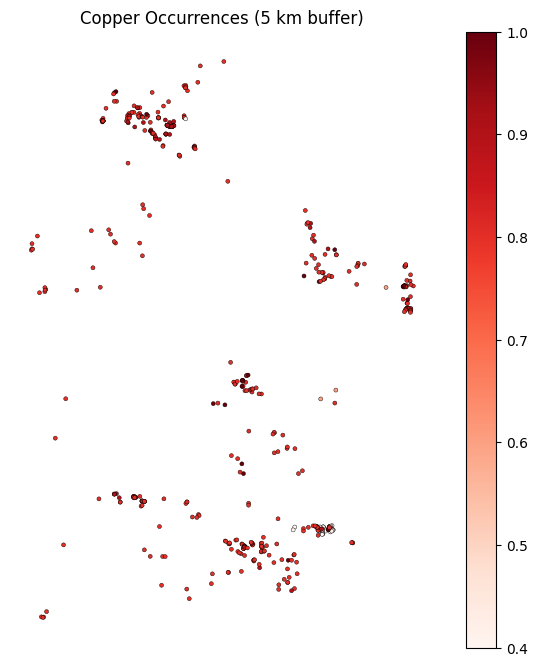

In [40]:
#Plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

gdf_label.plot(
    ax=ax,
    column="status_weight",   # hoặc STATUS / MIN_CATGRY
    cmap="Reds",
    legend=True,
    edgecolor="black",
    linewidth=0.3
)

ax.set_title("Copper Occurrences (5 km buffer)")
ax.set_axis_off()

plt.show()


In [41]:
#Interactive map
gdf_wgs84 = gdf_label.to_crs(epsg=4326)
import folium

m = folium.Map(location=[-20, 133], zoom_start=5)

folium.GeoJson(
    gdf_wgs84,
    style_function=lambda x: {
        "fillColor": "red",
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.5,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["NAME", "STATUS", "status_weight"],
        aliases=["Name", "Status", "Weight"]
    )
).add_to(m)

m


In [42]:
gdf_label = gdf_label.to_crs(28352)
xmin, ymin, xmax, ymax = gdf_label.total_bounds

In [43]:
cell_size = 500  # meters

xs = np.arange(xmin, xmax, cell_size)
ys = np.arange(ymin, ymax, cell_size)

polys = [
    box(x, y, x + cell_size, y + cell_size)
    for x in xs
    for y in ys
]

gpd_grid = gpd.GeoDataFrame(
    geometry=polys,
    crs=28352
)


In [44]:
gpd_grid

,geometry
0,"POLYGON ((501931 7249146, 501931 7249646, 5014..."
1,"POLYGON ((501931 7249646, 501931 7250146, 5014..."
2,"POLYGON ((501931 7250146, 501931 7250646, 5014..."
3,"POLYGON ((501931 7250646, 501931 7251146, 5014..."
4,"POLYGON ((501931 7251146, 501931 7251646, 5014..."
...,...
5358531,"POLYGON ((1462431 8640646, 1462431 8641146, 14..."
5358532,"POLYGON ((1462431 8641146, 1462431 8641646, 14..."
5358533,"POLYGON ((1462431 8641646, 1462431 8642146, 14..."
5358534,"POLYGON ((1462431 8642146, 1462431 8642646, 14..."


In [45]:
# Set label into grid

In [46]:
grid_label = gpd.sjoin(
    gpd_grid,
    gdf_label[['status_weight', 'geometry']],
    how='left',
    predicate='intersects'
)

label_agg = (
    grid_label
    .groupby(grid_label.index)
    .agg(label=('status_weight', 'max'))
)

gpd_grid['label'] = label_agg['label'].fillna(0)


In [47]:
gpd_grid.label.value_counts()

label
0.0    5265917
0.8      67958
1.0      11170
0.9      10423
0.4       1951
0.6       1117
Name: count, dtype: int64

In [48]:
gpd_grid.crs

<Projected CRS: EPSG:28352>
Name: GDA94 / MGA zone 52
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Australia - onshore and offshore between 126°E and 132°E.
- bounds: (125.99, -37.38, 132.0, -9.1)
Coordinate Operation:
- name: Map Grid of Australia zone 52
- method: Transverse Mercator
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [50]:
gpd_grid.to_parquet(BASE_DIR / MIN_STRINGS_PATH  / "grid_with_labels.parquet")